In [25]:
import json
import pickle
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
def get_dataframe(raw_file_path):
    with open(raw_file_path) as f:
        j = json.load(f)
    column_names = [el["name"] for el in j["rawDataBody"]["dataColumns"]]
    df = pd.DataFrame(j["rawDataBody"]["dataBlock"], columns=column_names)

    return df

In [27]:
df_sample_1 = get_dataframe("raw_data/matrix_1/Sample_1.bmerawdata")
df_sample_2 = get_dataframe("raw_data/matrix_1/Sample_2.bmerawdata")
df_air_1 = get_dataframe("raw_data/matrix_0/Air_1.bmerawdata")
df_air_2 = get_dataframe("raw_data/matrix_0/Air_2.bmerawdata")

In [28]:
df_sample_2["Time Since PowerOn"] += df_sample_1["Time Since PowerOn"].iloc[-1]
df_air_2["Time Since PowerOn"] += df_air_1["Time Since PowerOn"].iloc[-1]

In [17]:
def build_sensor_data(df):
    df["Date"] = pd.to_datetime(
        df["Real time clock"],
        unit="s",
        utc=True).map(lambda x: x.tz_convert("Europe/Istanbul"))
    df["Date"] = df["Date"].dt.tz_localize(None)

    sensor_indexes = sorted(df["Sensor Index"].unique())

    sensors = {}
    for i in sensor_indexes:
        sensors[i] = {}
        sensor = df[df["Sensor Index"] == i]
        heater_indexes = sorted(sensor["Heater Profile Step Index"].unique())
        for j in heater_indexes:
            sensors[i][j] = sensor[sensor["Heater Profile Step Index"] == j]

    return sensors

In [18]:
print(len(df_sample_1), len(df_sample_2))
print(len(df_air_1), len(df_air_2))

28938 59114
28962 59184


In [29]:
df_sample_merged = pd.concat([df_sample_1, df_sample_2])
df_air_merged = pd.concat([df_air_1, df_air_2])
print(len(df_sample_merged))
print(len(df_air_merged))

88052
88146


In [31]:
df_sample_merged.to_csv("mat_0.csv")
df_air_merged.to_csv("mat_1.csv")

In [20]:
sensor_data = {}
dataframes = [df_sample_merged, df_air_merged]
for matrix in range(2):
    df = dataframes[matrix]
    sensor_data[f"mat_{matrix}"] = build_sensor_data(df)

with open("raw_sensor_data.pkl", "wb") as f:
    pickle.dump(sensor_data, f)

In [21]:
sensor_data["mat_0"][0][0]

,Sensor Index,Sensor ID,Time Since PowerOn,Real time clock,Temperature,Pressure,Relative Humidity,Resistance Gassensor,Heater Profile Step Index,Scanning Mode Enabled,Scanning Cycle Index,Label Tag,Error Code,Date
0,0,355899974,6728,1765525609,18.801903,925.346313,37.780781,14209887.0,0,1,1,0,0,2025-12-12 10:46:49
78,0,355899974,25098,1765525628,23.326515,925.463135,32.519207,102400000.0,0,1,1,0,0,2025-12-12 10:47:08
161,0,355899974,43241,1765525646,24.306507,925.405762,30.469034,102400000.0,0,1,1,0,0,2025-12-12 10:47:26
242,0,355899974,61521,1765525664,25.059406,925.427185,28.886415,102400000.0,0,1,1,0,0,2025-12-12 10:47:44
326,0,355899974,79825,1765525682,25.676540,925.412476,27.783155,102400000.0,0,1,1,0,0,2025-12-12 10:48:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58726,0,355899974,19522500,1765545132,35.961128,923.885986,22.798069,102400000.0,0,1,1,0,0,2025-12-12 16:12:12
58806,0,355899974,19540804,1765545151,35.971001,923.866150,22.836151,102400000.0,0,1,1,0,0,2025-12-12 16:12:31
58889,0,355899974,19559237,1765545169,35.993221,923.856750,22.789715,102400000.0,0,1,1,0,0,2025-12-12 16:12:49
58972,0,355899974,19577589,1765545187,35.896935,923.865295,22.841471,102400000.0,0,1,1,0,0,2025-12-12 16:13:07


In [22]:
def plot_sensor(matrix, sensor_idx, sensor_data):
    plt.figure(figsize=(12, 4))
    plt.title(f"Matrix {matrix}, Sensor {sensor_idx}")
    plt.yscale("log")
    for hp_idx, val in sensor_data[f"mat_{matrix}"][sensor_idx].items():
        resistance = val["Resistance Gassensor"].values
        time_ms = val["Time Since PowerOn"].values
        plt.plot(time_ms, resistance, label=f"HP {hp_idx}")
    plt.legend()
    plt.show()

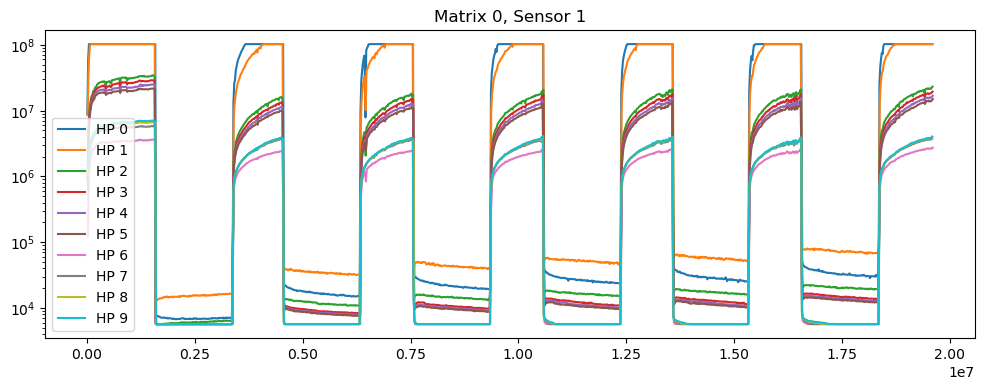

In [23]:
plot_sensor(0, 1, sensor_data)

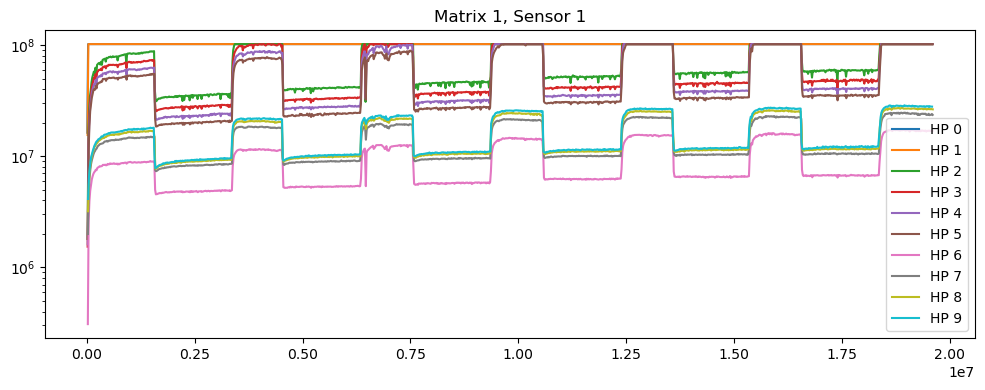

In [24]:
plot_sensor(1, 1, sensor_data)